# SMS Spam Detection

### Steps we are going to follow. <br>
Step 1: Import Data <br>
Step 2: Data Cleaning <br>
Step 3: EDA <br>
Step 4: Model Building <br>
Step 5: Evaluation <br>
Step 6: Improvement <br>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Import Data

In [11]:
import chardet

# Detect the encoding of the file
with open("D:/Machine Learning/Machine Learning/Datasets/sms_spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)  # This will give you the encoding

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}


In [16]:
spam = pd.read_csv("D:/Machine Learning/Machine Learning/Datasets/sms_spam.csv", encoding='Windows-1252')

In [ ]:
spam.shape

In [19]:
spam.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1888,ham,No. On the way home. So if not for the long dr...,NaN,NaN,NaN
5077,spam,Do you want a New Nokia 3510i colour phone Del...,NaN,NaN,NaN
3420,spam,Welcome! Please reply with your AGE and GENDER...,NaN,NaN,NaN
4140,ham,Beautiful truth : Expression of the face could...,NaN,NaN,NaN
1845,ham,Hi. || Do u want | to join me with sts later? ...,NaN,NaN,NaN


## Step 2: Data Cleaning

In [27]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [28]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [30]:
# Drop 3 columns
spam.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [31]:
spam.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# Renaming column names
spam.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)

In [33]:
spam.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
# Encoding `ham` & `spam` to 0 & 1
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
spam['Target'] = encoder.fit_transform(spam['Target'])

In [41]:
spam.sample(5)

,Target,Text
1655,0,At 7 we will go ok na.
2249,1,"Thanks for your ringtone order, ref number R83..."
2843,0,Today iZ Yellow rose day. If u love my frndshi...
5212,0,K.k.how is your business now?
2720,0,Ok lor...


In [42]:
# Check for duplicated Values
spam.duplicated().sum()

403

In [45]:
# Remove Duplicate values
spam.drop_duplicates(keep='first', inplace=True)

In [48]:
spam.shape

(5169, 2)

## Step 3: EDA

Let's see the ratio of `spam` and `ham` data

In [49]:
spam['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

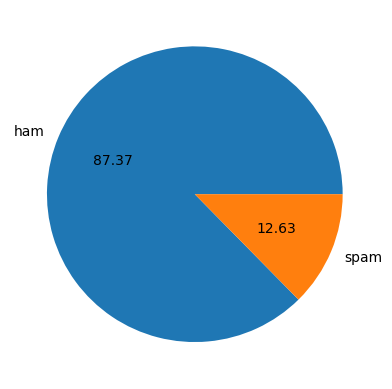

In [52]:
plt.pie(spam['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

We can see that data is imbalanced <br>
### Let's analyse words in data

In [54]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ask50\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True